In [31]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import keras
import keras.utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import regularizers 
from keras.models import load_model

tensorboardcb = keras.callbacks.TensorBoard(log_dir='/home/samur/personal/keras-exercises/mnist-keras/logs', histogram_freq=0,write_graph=True, write_images=False)

np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 30
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs

class LossHistory(keras.callbacks.Callback): 
    def on_train_begin(self, logs={}): 
        self.losses = [] 
    def on_batch_end(self, batch, logs={}): 
        self.losses.append(logs.get('loss')) 

losshistory = LossHistory() 


         
model = Sequential()

#model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Dense(N_HIDDEN, input_dim=RESHAPED, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=[losshistory,tensorboardcb])
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_38 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


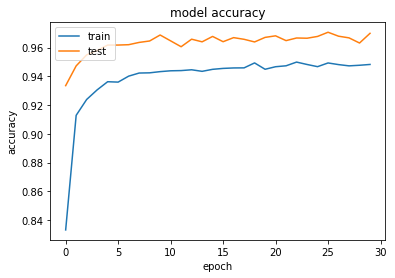

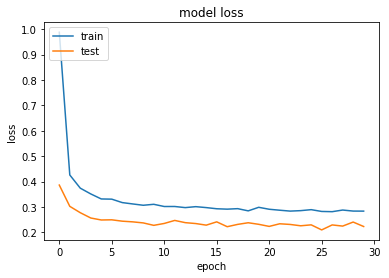

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
print(losshistory.losses)

[4.590208, 4.51606, 4.405379, 4.2632923, 4.2002687, 4.1417923, 4.036482, 3.9411952, 3.826873, 3.7673044, 3.6192226, 3.6004105, 3.45794, 3.2912197, 3.308372, 3.154193, 3.104372, 3.0178423, 2.886285, 2.8653054, 2.889731, 2.6293976, 2.6082606, 2.5224955, 2.5043354, 2.459223, 2.2919888, 2.269534, 2.2466698, 2.1290836, 2.2488818, 2.1254177, 2.0422196, 1.9640691, 1.936694, 1.9137658, 1.9301417, 1.7635832, 1.833937, 1.8485796, 1.9107748, 1.8607253, 1.7263777, 1.7247772, 1.8519121, 1.6921395, 1.5713836, 1.7323014, 1.4565456, 1.5765787, 1.6536293, 1.4366571, 1.474051, 1.443334, 1.5728834, 1.3917545, 1.3911994, 1.3704226, 1.2428832, 1.2651283, 1.4119904, 1.3619907, 1.2897407, 1.4693729, 1.2496977, 1.164108, 1.288966, 1.2939422, 1.3421912, 1.268916, 1.2380764, 1.1066397, 1.1542739, 1.1089051, 0.94017667, 1.0534983, 1.2334914, 1.1420147, 1.3043357, 1.0942061, 1.023534, 1.1648493, 1.0645133, 1.1575274, 1.2103565, 1.1033608, 1.2285109, 1.1234635, 1.2328123, 1.0059967, 1.1475894, 0.9786825, 0.9571421

ModuleNotFoundError: No module named 'gevent.wsgi'

In [28]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 74us/step
Test score: 0.21753244590759277
Test accuracy: 0.9695


In [29]:
predictions = model.predict(X_test)
model.predict_proba(X_test)[0]
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
model.save('my_model.h5')
# creates a HDF5 file 'my_model.h5' del model
# deletes the existing model
# returns a compiled model
# identical to the previous one model = load_model('my_model.h5')